In [620]:
import random
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [621]:
def rle_decode(mask_rle, shape):
    """
    Decodes run-length encoded segmentation mask string into 2d array

    Parameters
    ----------
    :param rle_mask (str): Run-length encoded segmentation mask string.
    :param shape (tuple): (height, width) of array to return
    :return mask [numpy.ndarray of shape (height, width)]: Decoded 2d segmentation mask
    """
    # Splits the RLE string into a list of string by whitespaces.
    s = mask_rle.split()

    # This creates two numpy arrays, one with the RLE starts and one with their respective lengths
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]

    # To obtain the end point we need to substract 1 to the length or start because the initial point counts.
    starts -= 1
    ends = starts + lengths

    # Create a 1D array of size H*W of zeros
    mask = np.zeros(shape[0]*shape[1], dtype=np.uint8)

    # Fill this array with ones in the positions where there is a mask using the RLE information
    for start, end in zip(starts, ends):
        mask[start:end] = 1

    # Reshape the 1D array into a 2D array so we can finally get the binary 2D mask.
    mask = mask.reshape(shape)
    return mask.T

In [625]:
df = pd.read_csv('../Severstal/train.csv')
df.head(5)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [622]:
target_class = 4

images_path = '../Severstal/train_images'
df = df[df['ClassId'] == target_class]
idx = random.randint(0, len(df))
name = df.iloc[idx]['ImageId']
mask = rle_decode(df.iloc[idx]['EncodedPixels'], (1600,256))
image = cv2.imread(os.path.join(images_path, name))

In [623]:
contours, hierarchy = cv2.findContours(mask ,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for i, contour in enumerate(contours):
    cv2.drawContours(image, contour, -1, (0, 0, 255), 2)

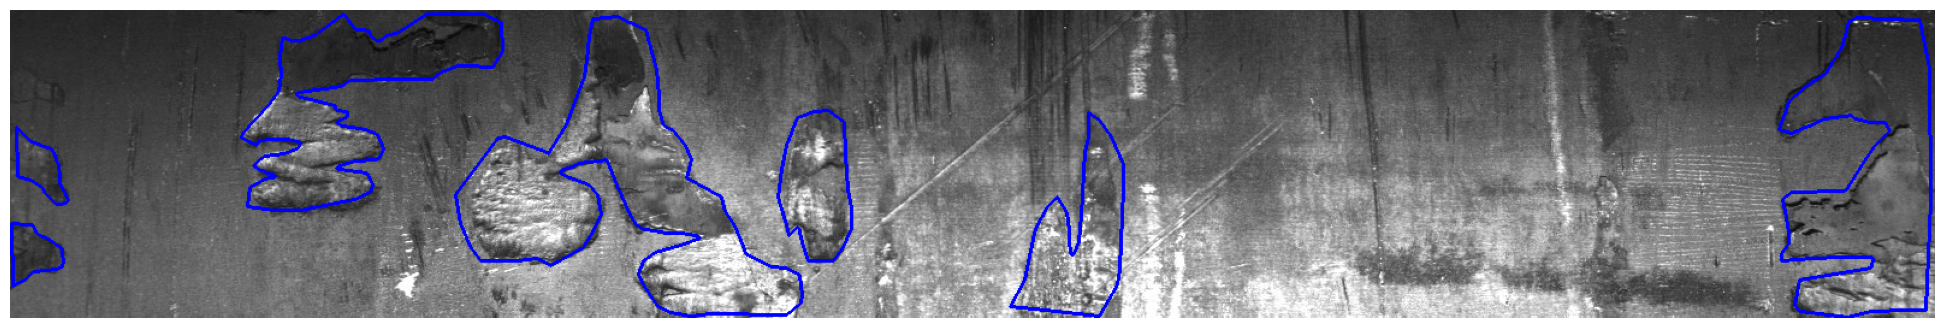

In [624]:


plt.figure(figsize=(30, 4))    
plt.imshow(image)  
plt.axis('off')
plt.show()

